Chuẩn bị các thư viện cần dùng:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd

# 1. Mô hình LinearRegression:


Khởi tạo một tập dữ liệu tuyến tính mẫu:

`X` có dạng `(x0, x1)`, ở đây ta lấy `x0 = 0`

`y` có dạng phương trình: `y = x0 * p0 + x1 * p1 + noise`, với `p0`, `p1` là hệ số của phương trình, `noise` biểu thị độ nhiễu (độ tản mát) của tập dữ liệu


In [2]:
X : np.ndarray= np.array([[1, 5 * rd.random()] for _ in range(1, 100)])
print(X)
params = np.array([5, 12])
y = X.dot(params) + np.array([20 * rd.random() for _ in range(1, 100)])

print(X)
print(y)


[[1.         2.95699607]
 [1.         3.06435848]
 [1.         2.54770439]
 [1.         4.66345045]
 [1.         3.36752648]
 [1.         0.10354273]
 [1.         0.37494743]
 [1.         4.90975645]
 [1.         1.94341253]
 [1.         4.25195464]
 [1.         1.14112599]
 [1.         2.53260629]
 [1.         3.2043027 ]
 [1.         3.25536092]
 [1.         2.14919406]
 [1.         4.90881021]
 [1.         4.95234881]
 [1.         1.7664501 ]
 [1.         0.81364326]
 [1.         0.7110594 ]
 [1.         3.69471842]
 [1.         1.37539255]
 [1.         3.45802113]
 [1.         3.12702138]
 [1.         2.10317928]
 [1.         0.04411618]
 [1.         3.81068931]
 [1.         3.81399959]
 [1.         0.5551616 ]
 [1.         1.23168305]
 [1.         0.4486339 ]
 [1.         3.51023704]
 [1.         4.43453364]
 [1.         3.40721675]
 [1.         3.29548802]
 [1.         1.31431047]
 [1.         0.16606084]
 [1.         0.76878573]
 [1.         2.37786844]
 [1.         4.4640536 ]


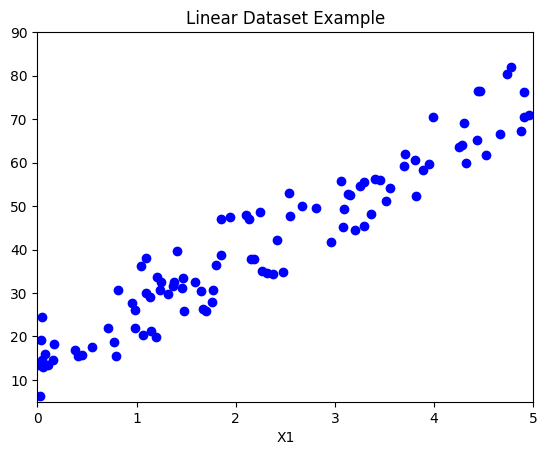

In [3]:
plt.plot([X[i][1] for i in range(0, 99)], y, "ob")
plt.title("Linear Dataset Example")
plt.axis([0, 5, 5, 90])
plt.xlabel("X1")
plt.show()

## 1.1. Sử dụng phương trình chuẩn tìm ra các tham số:

In [4]:
theta : np.ndarray = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

array([13.7806199 , 12.05974882])

Vẽ đường thẳng dự đoán của mô hình:

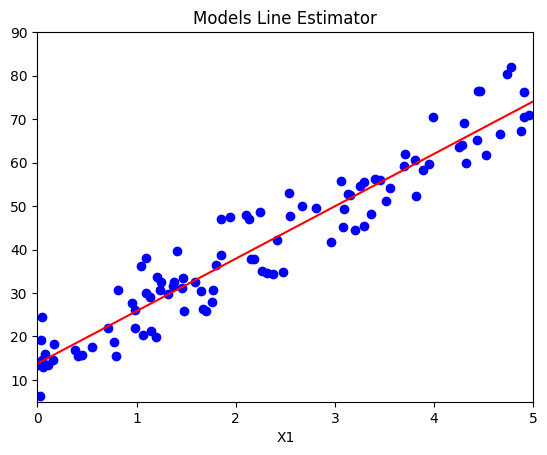

In [5]:
X_new = np.array([[1, 0], [1, 5]])
y_predict = X_new.dot(theta)

# Vẽ mô hình
plt.plot([X[i][1] for i in range(0, 99)], y, "ob")
plt.title("Models Line Estimator")
plt.axis([0, 5, 5, 90])
plt.xlabel("X1")
plt.plot([X_new[0][1], X_new[1][1]], y_predict, "r-")



In [6]:
def plot_model_line(X, y, theta, type_of_line='r-'):
    X_new = np.array([[1, 0], [1, 5]])
    y_predict = X_new.dot(theta)
    plt.plot([X[i][1] for i in range(0, 99)], y, "ob")
    plt.title("Models Line Estimator")
    plt.axis([0, 5, 5, 90])
    plt.xlabel("X1")
    plt.plot([X_new[0][1], X_new[1][1]], y_predict, type_of_line)


## 1.2. Sử dụng giải thuật Gradient Descent:

Về phương trình gradient đã trình bày trong vở:

step 0: [ -79.67116574 -231.61282688]
step 1: [ 41.60520542 142.79901483]
step 2: [-31.66367871 -84.62342015]
step 3: [13.15747809 53.33574757]
step 4: [-13.73218041 -30.52358136]
step 5: [ 2.8969899  20.28929501]
step 6: [ -6.91038454 -10.65253095]
step 7: [-0.68332387  8.04411451]
step 8: [-4.20528298 -3.39023538]
step 9: [-1.82227965  3.47246346]
step 10: [-3.03716943 -0.76884003]
step 11: [-2.08005175  1.73510168]
step 12: [-2.45320029  0.14774439]
step 13: [-2.02975733  1.0477886 ]
step 14: [-2.10036104  0.44109605]
step 15: [-1.88090812  0.75234181]
step 16: [-1.84690657  0.50932887]
step 17: [-1.7091782   0.60567236]
step 18: [-1.64281444  0.49870397]
step 19: [-1.54107207  0.5177356 ]
step 20: [-1.46833414  0.46270486]
step 21: [-1.38511472  0.45494134]
step 22: [-1.31500818  0.42066341]
step 23: [-1.24333267  0.40454853]
step 24: [-1.17866288  0.37936338]
step 25: [-1.11547234  0.36153773]
step 26: [-1.05681245  0.34099884]
step 27: [-1.00054304  0.32376891]
step 28: [-0.94769

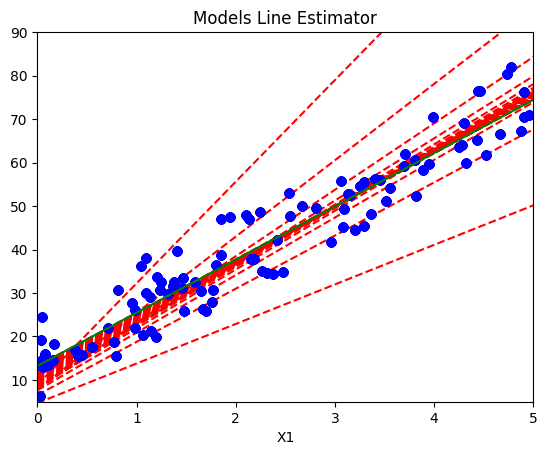

In [7]:
n_iters = 100 # Number of iterations
eta = 0.1 # Learning rate
m = 99 # Number of instances
tol = 1e-1

# Khởi tạo bộ giá trị ngẫu nhiên cho theta:
theta = np.array([rd.random(), rd.random()])
for iter in range(n_iters):
    stop : bool = False
    gradient = (2 / m) * X.T.dot(X.dot(theta) - y)
    print(f"step {iter}: {gradient}")
    for t in gradient:
        if abs(t) <= tol:
            stop = True
            print("Stop")
    if stop:
        break
    theta = theta - eta * gradient
    plot_model_line(X, y, theta, "r--")

plot_model_line(X, y, theta, "g-")
print(theta)

plt.show()

# 2. Logistic Regression

In [8]:
from sklearn import datasets

iris_dataset = datasets.load_iris()


In [9]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
X = iris_dataset["data" ][:, 3:]  # petal width
y = (iris_dataset["target" ] == 2).astype(np.int_)

print(X)


[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.1]
 [0.2]
 [0.4]
 [0.4]
 [0.3]
 [0.3]
 [0.3]
 [0.2]
 [0.4]
 [0.2]
 [0.5]
 [0.2]
 [0.2]
 [0.4]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.1]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.3]
 [0.3]
 [0.2]
 [0.6]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [1.4]
 [1.5]
 [1.5]
 [1.3]
 [1.5]
 [1.3]
 [1.6]
 [1. ]
 [1.3]
 [1.4]
 [1. ]
 [1.5]
 [1. ]
 [1.4]
 [1.3]
 [1.4]
 [1.5]
 [1. ]
 [1.5]
 [1.1]
 [1.8]
 [1.3]
 [1.5]
 [1.2]
 [1.3]
 [1.4]
 [1.4]
 [1.7]
 [1.5]
 [1. ]
 [1.1]
 [1. ]
 [1.2]
 [1.6]
 [1.5]
 [1.6]
 [1.5]
 [1.3]
 [1.3]
 [1.3]
 [1.2]
 [1.4]
 [1.2]
 [1. ]
 [1.3]
 [1.2]
 [1.3]
 [1.3]
 [1.1]
 [1.3]
 [2.5]
 [1.9]
 [2.1]
 [1.8]
 [2.2]
 [2.1]
 [1.7]
 [1.8]
 [1.8]
 [2.5]
 [2. ]
 [1.9]
 [2.1]
 [2. ]
 [2.4]
 [2.3]
 [1.8]
 [2.2]
 [2.3]
 [1.5]
 [2.3]
 [2. ]
 [2. ]
 [1.8]
 [2.1]
 [1.8]
 [1.8]
 [1.8]
 [2.1]
 [1.6]
 [1.9]
 [2. ]
 [2.2]
 [1.5]
 [1.4]
 [2.3]
 [2.4]
 [1.8]
 [1.8]
 [2.1]
 [2.4]
 [2.3]
 [1.9]

In [11]:
from sklearn.linear_model import LogisticRegression

lgt = LogisticRegression(C=1, solver='lbfgs', random_state=42)

lgt.fit(X, y)

LogisticRegression(C=1, random_state=42)

In [12]:
lgt.predict_proba([[1.66008]])

array([[0.50036031, 0.49963969]])

In [73]:
lgt.coef_

array([[4.3330846]])

In [65]:
lgt.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [13]:
from sklearn.base import BaseEstimator
import numpy as np


class MyLinearRegression(BaseEstimator):
    def __init__(self, eta: float = 1, tol: float = 1e-6, n_iters: int = 1000) -> None:
        self.__X = None
        self.__y = None
        self.__coef0 = None
        self.__eta = eta
        self.__tol = tol
        self.__n_iters = n_iters
        super().__init__()

    def fit(self, X, y):
        m = len(X)
        self.__X = X
        self.__y = y
        theta: np.ndarray = np.zeros((2,1))
        print(theta)
        print(f"X.shape = {X.shape}\ny.shape = {y.shape}\ntheta.shape = {theta.shape}")
        for iter in range(self.__n_iters):
            stop: bool = False
            gradient = (2 / m) * X.T.dot(X.dot(theta) - y.T)
            print(f"{iter}: {gradient}")
            for t in gradient[0]:
                if abs(t) <= self.__tol:
                    stop = True
            if stop:
                break
            theta = theta - self.__eta * gradient
        self.__coef0 = theta

    def predict(self, X: np.ndarray):
        return X.dot(self.__coef0)

    @property
    def coef0(self) -> np.ndarray:
        return self.__coef0


In [14]:
X: np.ndarray = np.array([[1, x] for x in range(2005, 2013)])
y = np.array([[7, 7.9, 9.19, 11.45, 11.60, 12.73, 15.17, 17.49]])
print(y.shape)
theta: np.ndarray = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y.T)
theta


(1, 8)


array([[-2.87087036e+03],
       [ 1.43511905e+00]])

In [15]:
X_new = np.array([[1, 2016]])
X_new.dot(theta)

array([[22.32964286]])

In [16]:
X

array([[   1, 2005],
       [   1, 2006],
       [   1, 2007],
       [   1, 2008],
       [   1, 2009],
       [   1, 2010],
       [   1, 2011],
       [   1, 2012]])

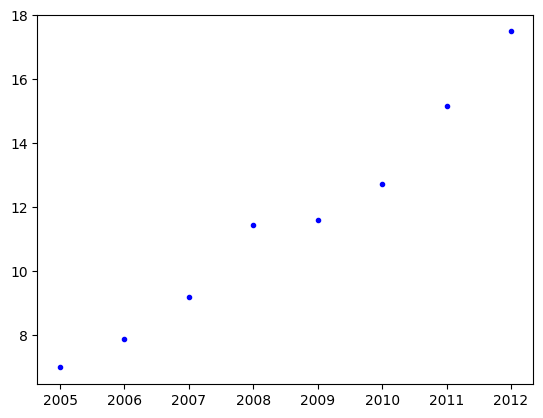

In [17]:
plt.plot([X[i][1] for i in range(8)], y.T, "b.")

In [18]:
t = MyLinearRegression(eta=0.000001, n_iters=1000)
t.fit(X, y)

[[0.]
 [0.]]
X.shape = (8, 2)
y.shape = (1, 8)
theta.shape = (2, 1)
0: [[-2.3132500e+01]
 [-4.6476695e+04]]
1: [[1.63564430e+02]
 [3.28504577e+05]]
2: [[-1.15603878e+03]
 [-2.32192193e+06]]
3: [[8.17112391e+03]
 [1.64117087e+07]]
4: [[-5.77547263e+04]
 [-1.16000534e+08]]
5: [[4.08219534e+05]
 [8.19909985e+08]]
6: [[-2.88535969e+06]
 [-5.79525250e+09]]
7: [[2.03941754e+07]
 [4.09617545e+10]]
8: [[-1.44149233e+08]
 [-2.89524112e+11]]
9: [[1.01886941e+09]
 [2.04640188e+12]]
10: [[-7.20152897e+09]
 [-1.44642898e+13]]
11: [[5.09015374e+10]
 [1.02235871e+14]]
12: [[-3.59780058e+11]
 [-7.22619187e+14]]
13: [[2.54298194e+12]
 [5.10758587e+15]]
14: [[-1.79741956e+13]
 [-3.61012188e+16]]
15: [[1.27044436e+14]
 [2.55169082e+17]]
16: [[-8.97970021e+14]
 [-1.80357514e+18]]
17: [[6.34699309e+15]
 [1.27479522e+19]]
18: [[-4.48615437e+16]
 [-9.01045277e+19]]
19: [[3.17088434e+17]
 [6.36872948e+20]]
20: [[-2.24123083e+18]
 [-4.50151799e+21]]
21: [[1.58413714e+19]
 [3.18174359e+22]]
22: [[-1.11969300e+2

C:\Users\Admin\AppData\Local\Temp\ipykernel_8368\732196090.py:31: RuntimeWarning: invalid value encountered in subtract
  theta = theta - self.__eta * gradient


458: [[nan]
 [nan]]
459: [[nan]
 [nan]]
460: [[nan]
 [nan]]
461: [[nan]
 [nan]]
462: [[nan]
 [nan]]
463: [[nan]
 [nan]]
464: [[nan]
 [nan]]
465: [[nan]
 [nan]]
466: [[nan]
 [nan]]
467: [[nan]
 [nan]]
468: [[nan]
 [nan]]
469: [[nan]
 [nan]]
470: [[nan]
 [nan]]
471: [[nan]
 [nan]]
472: [[nan]
 [nan]]
473: [[nan]
 [nan]]
474: [[nan]
 [nan]]
475: [[nan]
 [nan]]
476: [[nan]
 [nan]]
477: [[nan]
 [nan]]
478: [[nan]
 [nan]]
479: [[nan]
 [nan]]
480: [[nan]
 [nan]]
481: [[nan]
 [nan]]
482: [[nan]
 [nan]]
483: [[nan]
 [nan]]
484: [[nan]
 [nan]]
485: [[nan]
 [nan]]
486: [[nan]
 [nan]]
487: [[nan]
 [nan]]
488: [[nan]
 [nan]]
489: [[nan]
 [nan]]
490: [[nan]
 [nan]]
491: [[nan]
 [nan]]
492: [[nan]
 [nan]]
493: [[nan]
 [nan]]
494: [[nan]
 [nan]]
495: [[nan]
 [nan]]
496: [[nan]
 [nan]]
497: [[nan]
 [nan]]
498: [[nan]
 [nan]]
499: [[nan]
 [nan]]
500: [[nan]
 [nan]]
501: [[nan]
 [nan]]
502: [[nan]
 [nan]]
503: [[nan]
 [nan]]
504: [[nan]
 [nan]]
505: [[nan]
 [nan]]
506: [[nan]
 [nan]]
507: [[nan]
 [nan]]


In [19]:
t.coef0

array([[nan],
       [nan]])

# 4. Implement Logistic Regression

In [20]:
import math

In [122]:
X = iris_dataset["data"][:, 3:]  # petal width
y = (iris_dataset["target"] == 2).astype(np.int_)


In [123]:
X.shape

(150, 1)

In [67]:
def sigmoid(t):
    return 1 / (1 + math.exp(-t))


def dot(v1 : np.ndarray | list, v2 : np.ndarray | list):
    res = 0
    for i, j in zip(v1, v2):
        res += i * j
    return res

def minus(v1 : np.ndarray | list, v2 : np.ndarray | list):
    res = []
    for i, j in zip(v1, v2):
        res.append(i - j)
    return np.array(res)

def plus(v1 : np.ndarray | list, v2 : np.ndarray | list):
    res = []
    for i, j in zip(v1, v2):
        res.append(i + j)
    return np.array(res)


def scalar_multiple(v: np.ndarray | list, n):
    return np.array([n * i for i in v])

def grad_p_j(x: np.ndarray | list, y : np.ndarray | list, p: np.ndarray | list, i : int):
    return (sigmoid(dot(x, p)) - y) * x[i]


In [32]:
len(X)

150

In [54]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [125]:
X = np.c_[np.ones((150, 1)), X]


In [52]:
print(X[0], y[0])

[1.  0.2] 0


In [129]:
print(X.shape
      )

(150, 2)


In [126]:
n_iters = 1000  # Number of iterations
eta = 1  # Learning rate
m = 99  # Number of instances
tol = 1e-10
grad = [0, 0]
n = len(X[0])

p = np.random.rand(2)

for iter in range(n_iters):
    
    stop = False
    for j in range(n):
        res = 0
        for i, x in enumerate(X):
            res += grad_p_j(x, y[i], p, j)
        grad[j] = res   

    for x in grad:
        if abs(x) - tol < 0:
            stop = True
    
    if stop:
        break

    p = minus(p, scalar_multiple(grad, eta))

print(p)
    

[-130.1870181    82.40273333]


In [119]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
X_new = np.c_[np.ones((1000, 1)), X_new]
X_new[:10]

array([[1.        , 0.        ],
       [1.        , 0.003003  ],
       [1.        , 0.00600601],
       [1.        , 0.00900901],
       [1.        , 0.01201201],
       [1.        , 0.01501502],
       [1.        , 0.01801802],
       [1.        , 0.02102102],
       [1.        , 0.02402402],
       [1.        , 0.02702703]])

In [102]:
X_new[0][1]

0.0

In [120]:

y_proba_predict = []
for x in X_new:
    y_proba_predict.append(sigmoid(dot(x, p)))

In [98]:
y_proba_predict[:10]

[1.1753714572998055e-10,
 1.225917765523478e-10,
 1.2786377944537772e-10,
 1.333625023948594e-10,
 1.3909769539240395e-10,
 1.450795277235216e-10,
 1.5131860599916171e-10,
 1.5782599296269394e-10,
 1.646132271056696e-10,
 1.716923431271547e-10]

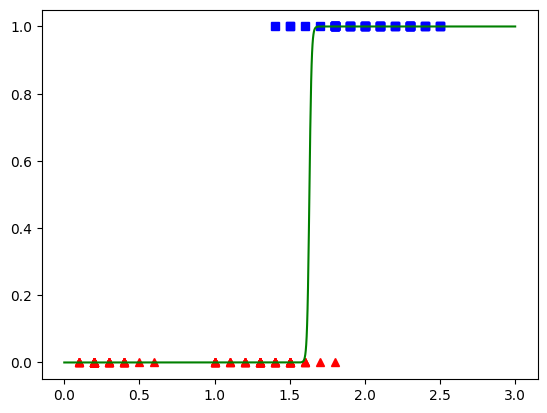

In [121]:
plt.plot([x[1] for i, x in enumerate(X) if y[i] == 0], [0 for i in y if i == 0], "r^")
plt.plot([x[1] for i, x in enumerate(X) if y[i] == 1], [1 for i in y if i == 1], "bs")
plt.plot([x[1] for x in X_new],
         y_proba_predict, "g-", label="Iris-Virginica")
